In [41]:
import sklearn 
import numpy as np
from collections import Counter
import matplotlib .pyplot as plt

In [42]:
cancer_dataSet=sklearn.datasets.load_breast_cancer()
cancer_dataSet

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [43]:
data = cancer_dataSet.data
labels = cancer_dataSet.target
print(data)
print(labels)
print(data.shape)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 

In [44]:
# stratify ensures that the class proportions stay the same in every split (train, validation, test) as in the original dataset.
X_train,X_remain,Y_train,Y_remain=sklearn.model_selection.train_test_split(data,labels,test_size=0.3,stratify=labels,random_state=42)

In [45]:
X_val,X_test,Y_val,Y_test=sklearn.model_selection.train_test_split(X_remain,Y_remain,test_size=0.5,stratify=Y_remain,random_state=42)

In [46]:
# print("Training set:", X_train.shape, Y_train.shape)
# print("Validation set:", X_val.shape, Y_val.shape)
# print("Test set:", X_test.shape, Y_test.shape)


In [47]:
class Node:
    def __init__ (self, feature=None, threshold=None, left=None, right=None, *, value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value 
    def is_leaf(self):
        return self.value is not None   
    

In [48]:
class DecisionTree:
    def __init__(self,min_samples_split=2,max_depth=100,number_of_features=None):
        self.min_samples_split=min_samples_split
        self.max_depth=max_depth
        self.number_of_features=number_of_features
        self.root = None
        


    def fit(self, x,y):
        self.feature_importance = np.zeros(x.shape[1])
        if self.number_of_features is None:
            self.number_of_features=x.shape[1]
        else :
            self.number_of_features=min(self.number_of_features,x.shape[1])
        self.root=self.grow_tree(x,y)

    def grow_tree(self,x,y,depth = 0):
        samples,features=x.shape
        label_number = len(np.unique(y))

        # Stopping criteria
        if(depth>=self.max_depth or samples<self.min_samples_split  or label_number==1):
            leaf_value=self.most_common_label(y)
            return Node(value=leaf_value)
        
        # Find the best split
        featuresIndex=np.random.choice(features,self.number_of_features,replace=False)
        best_threshold,best_feature,best_gain=self.best_split(x,y,featuresIndex)
        self.feature_importance[best_feature] += best_gain
        left_idx, right_idx = self.split(x[:,best_feature],best_threshold)
        left = self.grow_tree(x[left_idx,:],y[left_idx],depth+1)
        right = self.grow_tree(x[right_idx,:],y[right_idx],depth+1)
        return Node(best_feature,best_threshold,left,right)
        
    def most_common_label(self,y):
        counter=Counter(y)
        most_common=counter.most_common(1)[0][0]
        return most_common

    def best_split(self,x,y,featuresIndex):
        best_gain = -1
        split_threshold = None
        split_idx = None
        for feat_idx in featuresIndex:
            X_column = x[:,feat_idx]
            thresholds = np.unique(X_column)
            for threshold in thresholds:
                gain = self.information_gain(y,X_column,threshold)
                if gain > best_gain:
                    best_gain = gain
                    split_threshold = threshold
                    split_idx = feat_idx
        return split_threshold, split_idx, best_gain    
    
    def information_gain(self,y,X_column,split_threshold):
        parent_entropy = self.entropy(y)
        left_idx, right_idx = self.split(X_column,split_threshold)
        if len(left_idx) == 0 or len(right_idx) == 0:
            return 0
        n = len(y)
        n_left, n_right = len(left_idx), len(right_idx)
        e_left, e_right = self.entropy(y[left_idx]), self.entropy(y[right_idx])
        child_entropy = (n_left / n) * e_left + (n_right / n) * e_right 
        return parent_entropy - child_entropy

    def entropy(self,y):
        freq = np.bincount(y)
        prob = freq / len(y)
        entropy=0
        for p in prob:
            if p > 0:
                entropy -= p * np.log2(p)
        return entropy
        

    def split(self,x_column,split_threshold):
        left_idx = np.argwhere(x_column <= split_threshold).flatten()
        right_idx = np.argwhere(x_column > split_threshold).flatten()
        return left_idx, right_idx
    
    def predict(self,X):
        pred=np.array([])
        for x in X:
            pred=np.append(pred,self.dfs(x,self.root))
        return pred
    def dfs(self,x,node):
        if node.is_leaf():
            return node.value
        if x[node.feature] <= node.threshold:
            return self.dfs(x,node.left)
        else:
            return self.dfs(x,node.right)

In [49]:
def accuracy(y_true,y_pred):
    return np.sum(y_true==y_pred)/len(y_true)

In [50]:
clf_tree=DecisionTree()
clf_tree.fit(X_train,Y_train)
predictions=clf_tree.predict(X_test)

In [51]:
print("Decision Tree accuracy: ",accuracy(Y_test,predictions))

Decision Tree accuracy:  0.9418604651162791


# Hyper parameter Analysis

In [52]:
max_depth = [2,4,6,8,10]
min_samples_split = [2,5,10,20]
best_acc = 0
best_depth = None
best_split = None
results= []
results_for_depth = []
for depth in max_depth:
    for min_sample in min_samples_split:
        tree = DecisionTree(min_sample,depth)
        tree.fit(X_train,Y_train)
        val_predictions = tree.predict(X_val)
        acc_val = accuracy(Y_val,val_predictions)
        train_predictions = tree.predict(X_train)
        acc_train = accuracy(Y_train,train_predictions)
    
        print(f"Depth: {depth}, Min Samples Split: {min_sample}, Validation Accuracy: {acc_val}, Train Accuracy: {acc_train}")
        if acc_val > best_acc:
            best_acc = acc_val
            best_depth = depth
            best_split = min_sample
        results.append((depth,min_sample,acc_val,acc_train))
        if min_sample == 2:
            results_for_depth.append((depth,acc_val,acc_train))

Depth: 2, Min Samples Split: 2, Validation Accuracy: 0.9176470588235294, Train Accuracy: 0.9522613065326633
Depth: 2, Min Samples Split: 5, Validation Accuracy: 0.9176470588235294, Train Accuracy: 0.9522613065326633
Depth: 2, Min Samples Split: 10, Validation Accuracy: 0.9176470588235294, Train Accuracy: 0.9522613065326633
Depth: 2, Min Samples Split: 20, Validation Accuracy: 0.9176470588235294, Train Accuracy: 0.9522613065326633
Depth: 4, Min Samples Split: 2, Validation Accuracy: 0.9764705882352941, Train Accuracy: 0.992462311557789
Depth: 4, Min Samples Split: 5, Validation Accuracy: 0.9764705882352941, Train Accuracy: 0.992462311557789
Depth: 4, Min Samples Split: 10, Validation Accuracy: 0.9764705882352941, Train Accuracy: 0.9899497487437185
Depth: 4, Min Samples Split: 20, Validation Accuracy: 0.9529411764705882, Train Accuracy: 0.9698492462311558
Depth: 6, Min Samples Split: 2, Validation Accuracy: 0.9529411764705882, Train Accuracy: 0.9949748743718593
Depth: 6, Min Samples Spli

# Retrain 

In [53]:
combined_data = np.vstack((X_train, X_val))
combined_labels = np.hstack((Y_train, Y_val))
final_tree = DecisionTree(best_split,best_depth)
final_tree.fit(combined_data,combined_labels)

# Final Test 

In [54]:
final_predictions = final_tree.predict(X_test)
print("Decision Tree accuracy: ",accuracy(Y_test,final_predictions))

Decision Tree accuracy:  0.8837209302325582


# how training and validation accuracy change with max_depth

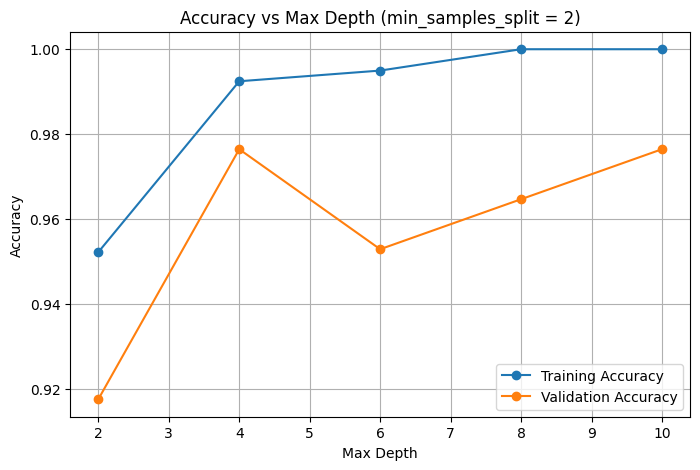

In [55]:
depths = [result[0] for result in results_for_depth]
val_accuracies = [result[1] for result in results_for_depth]
train_accuracies = [result[2] for result in results_for_depth]

plt.figure(figsize=(8,5))
plt.plot(depths, train_accuracies, marker='o', label='Training Accuracy')
plt.plot(depths, val_accuracies, marker='o', label='Validation Accuracy')

plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Max Depth (min_samples_split = 2)")
plt.grid(True)
plt.legend()
plt.show()

# Analysis and Evaluation 

In [56]:
def report (y_true,y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    tn = np.sum((y_true == 0) & (y_pred == 0))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    confusion_matrix = np.array([[tn, fp], [fn, tp]])
    return precision, recall, f1_score, confusion_matrix




In [57]:
precision, recall, f1_score,confusion_matrix = report(Y_test, final_predictions)
print(f"Precision: {precision}, Recall: {recall}, F1-Score: {f1_score}, accuracy: {accuracy(Y_test, final_predictions)}"),
cm = confusion_matrix
print(f"{cm}")


Precision: 0.8928571428571429, Recall: 0.9259259259259259, F1-Score: 0.9090909090909091, accuracy: 0.8837209302325582
[[26  6]
 [ 4 50]]


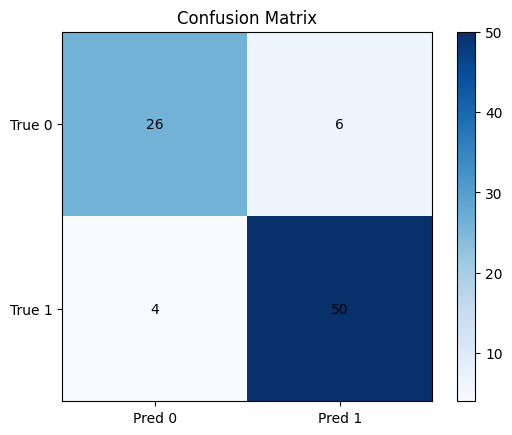

In [58]:
plt.imshow(cm, cmap='Blues')
plt.title("Confusion Matrix")
plt.colorbar()
plt.xticks([0,1], ["Pred 0", "Pred 1"])
plt.yticks([0,1], ["True 0", "True 1"])

for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i,j], ha='center', va='center', color='black')

plt.show()


Feature ranking:
1. feature worst concave points (1.248177098839898)
2. feature worst texture (1.090962151434669)
3. feature worst perimeter (0.5969353093394133)
4. feature worst radius (0.5549783415414403)
5. feature worst area (0.22497520938867202)
6. feature area error (0.024947807967425517)
7. feature worst smoothness (0.0)
8. feature worst compactness (0.0)
9. feature worst concavity (0.0)
10. feature worst symmetry (0.0)
11. feature fractal dimension error (0.0)
12. feature symmetry error (0.0)
13. feature concave points error (0.0)
14. feature worst fractal dimension (0.0)
15. feature concavity error (0.0)
16. feature compactness error (0.0)
17. feature smoothness error (0.0)
18. feature perimeter error (0.0)
19. feature texture error (0.0)
20. feature radius error (0.0)
21. feature mean fractal dimension (0.0)
22. feature mean symmetry (0.0)
23. feature mean concave points (0.0)
24. feature mean concavity (0.0)
25. feature mean compactness (0.0)
26. feature mean smoothness (0.0

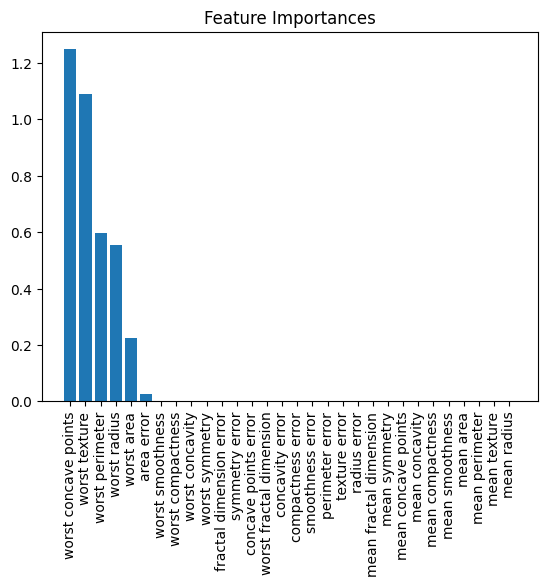

In [60]:
importances = final_tree.feature_importance
feature_names = cancer_dataSet.feature_names
indices = np.argsort(importances)[::-1]
print("Feature ranking:")
for f in range(len(feature_names)):
    print(f"{f + 1}. feature {feature_names[indices[f]]} ({importances[indices[f]]})")
plt.bar(range(len(importances)), importances[indices])
plt.xticks(range(len(importances)), feature_names[indices], rotation=90)
plt.title("Feature Importances")
plt.show()


#  Analyze relationship between tree depth and performance
validation accuracy increases then decreases

but training accuracy increases as depth increases

This demonstrates overfitting at deeper trees

# Overfitting Analysis: Compare training vs validation performance 
the good accuarcy when the depth is medium

small depths leads to underfitting 

large depth leads to overfitting